In [1]:
# Packages we will use
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [3]:
print(diabetes.data[0:2])

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]]


In [4]:
# First we will just use one variable as a predictor
diabetes_X = diabetes.data[:,2:3]

In [5]:
print(diabetes_X[0:2])

[[ 0.06169621]
 [-0.05147406]]


In [6]:
print(diabetes.target[0:5])

[ 151.   75.  141.  206.  135.]


In [7]:
# We split the dataset into Train and Test sets
train_x, test_x, train_y, test_y = train_test_split(diabetes_X, diabetes.target,
                                                        test_size=0.25)

In [8]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [9]:
# Train the model using the training sets
regr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(test_x)

In [11]:
# Let's check the results ...
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, diabetes_y_pred))

Coefficients: 
 [ 942.46507222]
Mean squared error: 3562.45
Variance score: 0.36


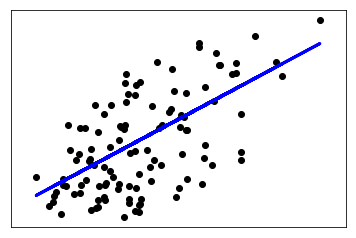

In [12]:
# Plot outputs
plt.scatter(test_x, test_y,  color='black')
plt.plot(test_x, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [13]:
# Check how bad the MSE is ...
y_bar_squared = (sum(test_y)/float(len(test_y)))**2
print(mean_squared_error(test_y, diabetes_y_pred)/y_bar_squared)

0.160558674079


In [14]:
# Now let's use all of the variables ...
diabetes_X = diabetes.data

In [15]:
print(diabetes_X[0:2])

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]]


In [16]:
# We split the dataset into Train and Test sets
train_x, test_x, train_y, test_y = train_test_split(diabetes_X, diabetes.target,
                                                        test_size=0.25)

In [17]:
# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
diabetes_y_pred = regr.predict(test_x)

In [18]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, diabetes_y_pred))

Mean squared error: 3046.87
Variance score: 0.44


In [19]:
# Check how bad the MSE is ...
y_bar_squared = (sum(test_y)/float(len(test_y)))**2
print(mean_squared_error(test_y, diabetes_y_pred)/y_bar_squared)

0.12775471361


In [20]:
# Here we plot the residuals 
residuals = test_y - diabetes_y_pred

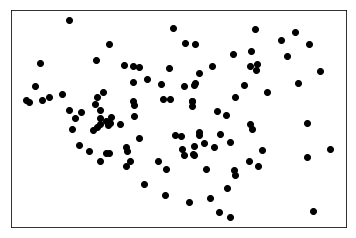

In [21]:
# Plot outputs
plt.scatter(diabetes_y_pred, residuals,  color='black')

plt.xticks(())
plt.yticks(())

plt.show()

In [22]:
# Let's try a quadratic fit ... we need to transform the data. We use PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

In [23]:
# Here create the necessary test and train features for the full quadratic case
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
test_x_poly = poly.fit_transform(test_x)

In [24]:
print(train_x_poly[0:1])

[[  1.00000000e+00  -2.73097857e-02  -4.46416365e-02   6.49296427e-02
   -2.22773986e-03  -2.49601584e-02  -1.72844490e-02   2.28686348e-02
   -3.94933829e-02  -6.11765951e-02  -6.32093012e-02   7.45824394e-04
    1.21915353e-03  -1.77321463e-03   6.08390982e-05   6.81656577e-04
    4.72034597e-04  -6.24537516e-04   1.07855582e-03   1.67071970e-03
    1.72623247e-03   1.99287571e-03  -2.89856551e-03   9.94499531e-05
    1.11426232e-03   7.71606088e-04  -1.02089328e-03   1.76304924e-03
    2.73102332e-03   2.82176665e-03   4.21585851e-03  -1.44646353e-04
   -1.62065417e-03  -1.12227310e-03   1.48485229e-03  -2.56429124e-03
   -3.97217446e-03  -4.10415735e-03   4.96282489e-06   5.56047398e-05
    3.85052560e-05  -5.09453694e-05   8.79809833e-05   1.36285539e-04
    1.40813880e-04   6.23009508e-04   4.31422585e-04  -5.70804748e-04
    9.85761093e-04   1.52697750e-03   1.57771417e-03   2.98752176e-04
   -3.95271752e-04   6.82621361e-04   1.05740374e-03   1.09253794e-03
    5.22974459e-04  

In [25]:
# Now let's fit the model and check out results again ...
regrPoly = linear_model.LinearRegression()
regrPoly.fit(train_x_poly, train_y)
diabetes_y_pred_poly = regrPoly.predict(test_x_poly)

In [26]:
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, diabetes_y_pred_poly))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, diabetes_y_pred_poly))

Mean squared error: 4691.96
Variance score: 0.14


In [27]:
y_bar_squared = (sum(test_y)/float(len(test_y)))**2
print(mean_squared_error(test_y, diabetes_y_pred_poly)/y_bar_squared)

0.196733194494


In [28]:
# The error actually got worse - we overfit!
# Finally, let's try Ridge and Lasso. We'll do Ridge first.
regrRidge = linear_model.Ridge(alpha = .05)

In [41]:
regrRidge.fit(train_x_poly, train_y)
diabetes_y_pred_ridge = regrRidge.predict(test_x_poly)

In [42]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, diabetes_y_pred_ridge))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, diabetes_y_pred_ridge))

Mean squared error: 2965.92
Variance score: 0.45


In [43]:
# Check how bad the MSE is ...
y_bar_squared = (sum(test_y)/float(len(test_y)))**2
print(mean_squared_error(test_y, diabetes_y_pred_ridge)/y_bar_squared)

0.12436057162


In [44]:
# Let's compare the coefficients ...
regr.coef_

array([  23.15152463, -265.58656521,  419.24818249,  393.26037224,
       -663.03406657,  487.93873601,  -90.03532683,  -47.58474318,
        797.35119328,   24.19921493])

In [45]:
regrRidge.coef_

array([  0.00000000e+00,   4.01184097e+01,  -2.39464503e+02,
         4.19648192e+02,   3.66899790e+02,  -8.86407143e+01,
        -6.40465830e+00,  -2.62729212e+02,   7.17304053e+00,
         5.24997726e+02,   3.87321587e+01,   1.17292646e+02,
         1.16009426e+02,   4.25786060e+01,   7.26872081e+01,
         2.99420400e+01,   9.04474984e+00,  -1.87992560e+01,
         4.80131111e+01,   8.68603311e+01,   8.30480360e+01,
        -1.44600215e+00,   5.03293582e+01,   7.16330950e+01,
         2.97911308e+01,  -4.32290600e+00,   2.98397997e+01,
         1.45007060e+00,   4.25198644e+01,   3.33631388e+01,
         8.51416838e+01,   9.02751141e+01,   2.40974519e+01,
         3.06946100e+00,   5.93634373e-01,   7.30582210e+00,
         7.16208212e+01,   8.26498387e+01,   3.65272190e+01,
         4.18685920e+01,   5.27789626e+01,  -1.49428679e+01,
         3.32386324e+01,   2.77197930e+01,   2.27067246e+01,
         4.79862026e-01,   7.23217528e+00,   4.12023824e+01,
        -5.17021022e+01,

In [46]:
# Not much of difference - seems all variables are important. We try Lasso ...
regrLasso = linear_model.Lasso(alpha = .1)

In [47]:
regrLasso.fit(train_x_poly, train_y)
diabetes_y_pred_lasso = regrLasso.predict(test_x_poly)

In [48]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, diabetes_y_pred_lasso))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, diabetes_y_pred_lasso))

Mean squared error: 3010.02
Variance score: 0.45


In [49]:
# Check how bad the MSE is ...
y_bar_squared = (sum(test_y)/float(len(test_y)))**2
print(mean_squared_error(test_y, diabetes_y_pred_lasso)/y_bar_squared)

0.126209446862


In [50]:
regrLasso.coef_

array([   0.        ,    0.        , -190.85474124,  422.49977513,
        355.7120898 ,  -43.54717222,   -0.        , -234.46967654,
         -0.        ,  526.2702617 ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,   -0.        ,    0.        ,    0.        ,
          0.        ,   -0.        ,    0.        ,    0.        ,
          0.        ,   -0.        ,    0.        ,   -0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,   -0.        ,   -0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,   -0.        ,    0.        ,    0.        ,
          0.        ,   -0.        ,   -0.        ,    0.        ,
         -0.        ,   -0.        ,    0.        ,   -0.        ,
          0.        ,   -0.        ,   -0.        ,    0.        ,
         -0.        ,    0.        ,    0.        ,   -0.     

In [ ]:
# Lasso zeroed out some betas, but seems they are all needed.